# Marketing Analytics

This is Exploratory Data Analysis on the marketing campaign data. <br>
Things we are going to cover here:
* Data Exploration
* Data Cleaning
* Feature Engineering 
* Exploratory Data Analysis

First we will import the libraries that we will need

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

reading the csv file into a dataset

In [3]:
df = pd.read_csv("marketing_data.csv")

### Data Exploration
Lets check first few columns how the data looks!

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Viewing the dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [9]:
df['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

### Data Cleaning
before performing any analysis on the data, lets do some data cleaning.
first we will check if data contains any null values.

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
df[df[' Income '].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [23]:
df['Income'][0]

84835.0

In [13]:
df.columns = df.columns.str.replace(' ', '')

# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

<ipython-input-13-e01b9e40f0ea>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


* The cleaned Dataset

In [ ]:
df.head()

### Handelling Null Values
Strategies
* Drop Values
* Impute Mean / Median
* Custom imputaions

In [14]:
df[df['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


Cheking Outliers

<AxesSubplot:>

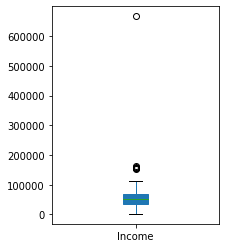

In [15]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

c:\users\yashb\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

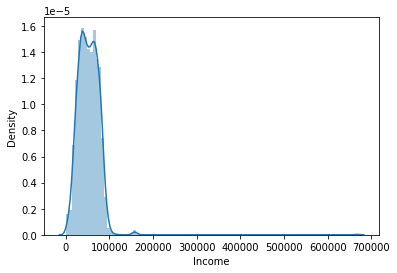

In [16]:
sns.distplot(df['Income'],bins=100)

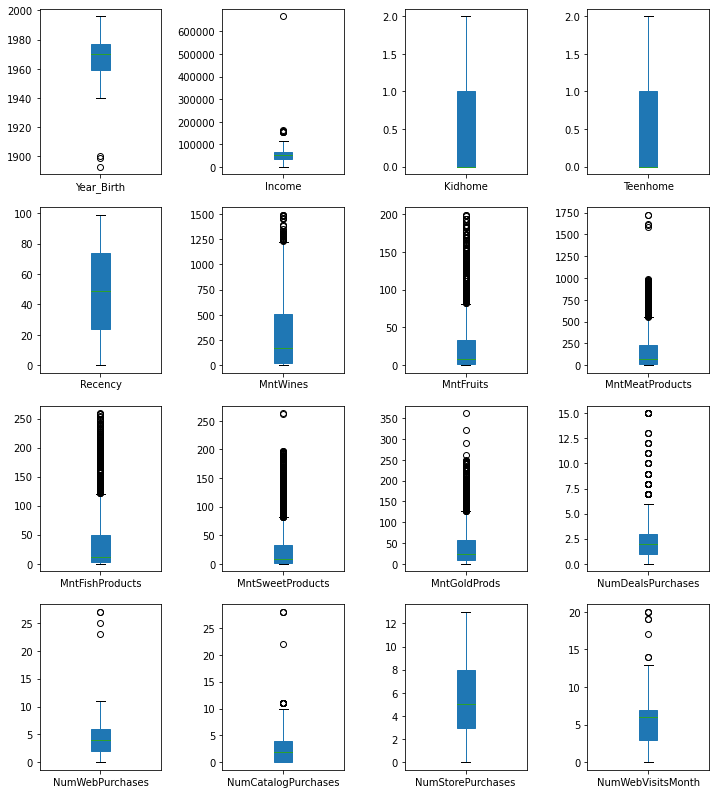

In [24]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

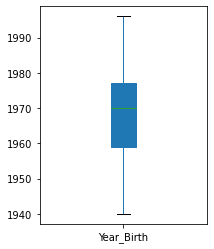

In [25]:
# year < 1900 remove
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True);

Imputing median because we have outliers in the dataset

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())

The Custome Imputations Technique 

In [17]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [18]:
df[df['Education'] == 'Graduation']['Income'].mean()

52720.37365591398

In [19]:
df[df['Education'] == 'PhD']['Income'].mean()

56145.31392931393

In [20]:
df[df['Education'] == 'Master']['Income'].mean()

52917.53424657534

In [21]:
df[df['Education'] == '2n Cycle']['Income'].mean()

47633.19

In [ ]:
def impute_income(cols):
    
    Income = cols[0]
    Edu = cols[1]
    
    if pd.isnull(Income):
        if Edu == 'Graduation':
            return 5272037.3
        elif Edu == 'PhD':
            return 5614531.3
        elif Edu == 'Master':
            return 5291753.42
        elif Edu == '2n Cycle':
            return 4763319.0
    else:
        return Income
               

In [ ]:
df['IntIncome'] = df[['IntIncome','Education']].apply(impute_income,axis=1)

In [ ]:
df['Income'].isnull().sum()

### EDA

In [26]:
sns.set(rc={'figure.figsize':(14,8.27)})

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

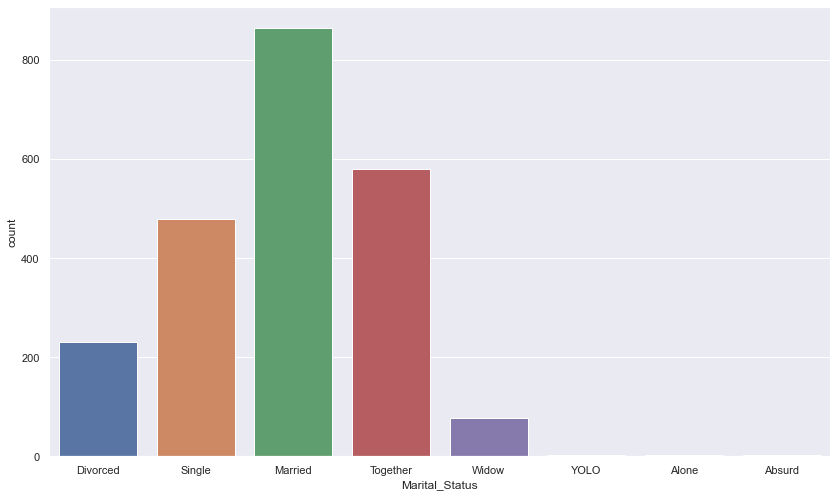

In [27]:
sns.countplot(x='Marital_Status',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

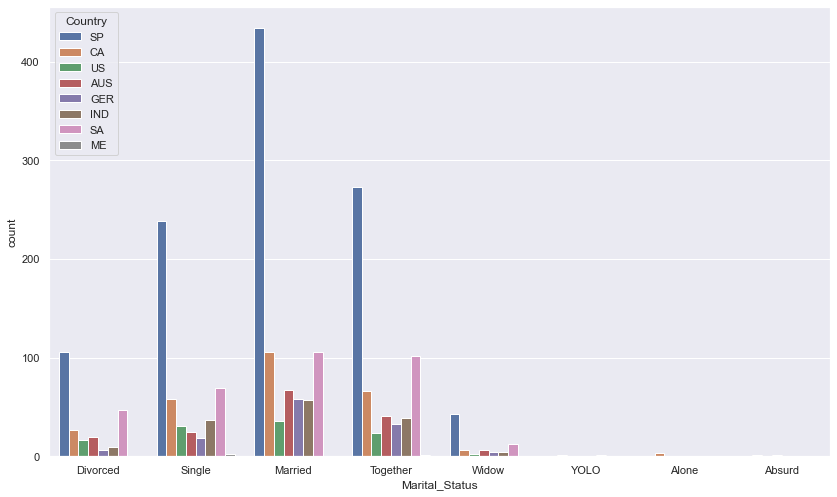

In [28]:
sns.countplot(x='Marital_Status',data=df, hue='Country')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

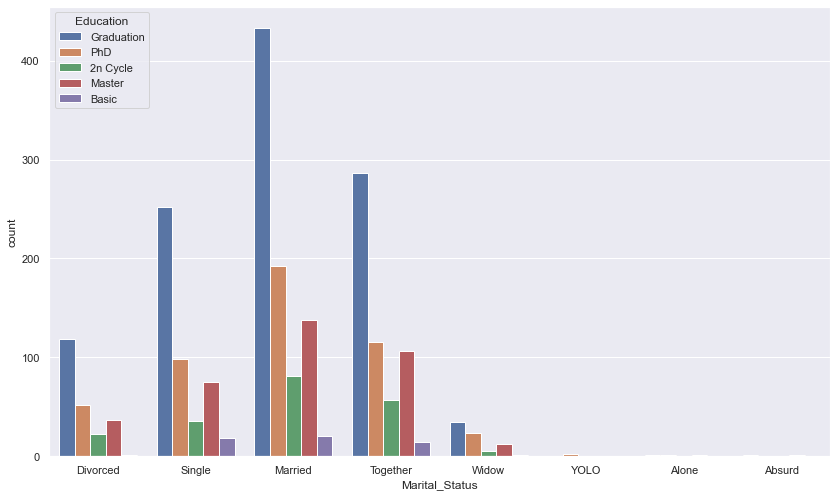

In [29]:
sns.countplot(x='Marital_Status',data=df, hue='Education')

In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


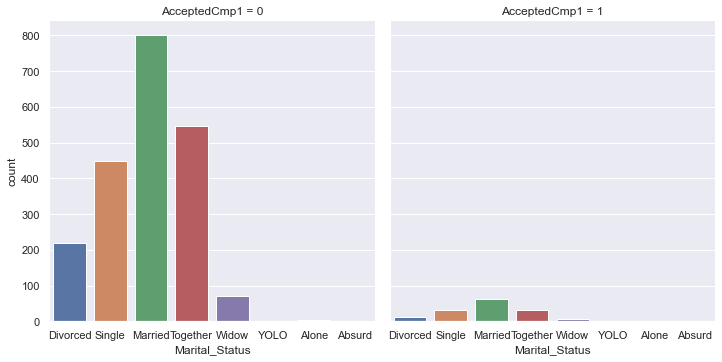

In [32]:
sns.catplot(x='Marital_Status',data=df, col='AcceptedCmp1',kind='count')

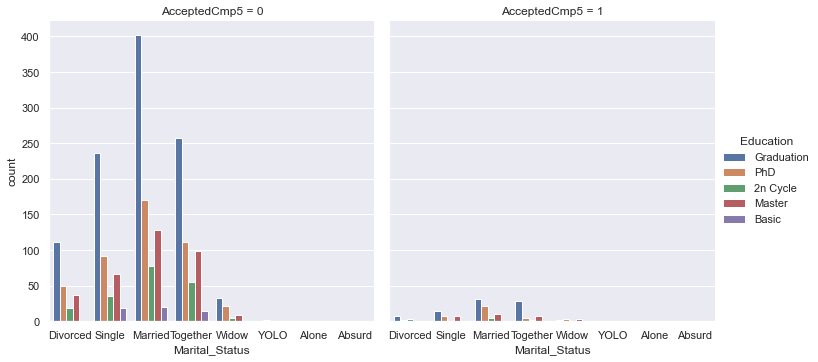

In [35]:
sns.catplot(x='Marital_Status',data=df, hue='Education', col='AcceptedCmp5',kind='count')

<AxesSubplot:xlabel='Complain', ylabel='count'>

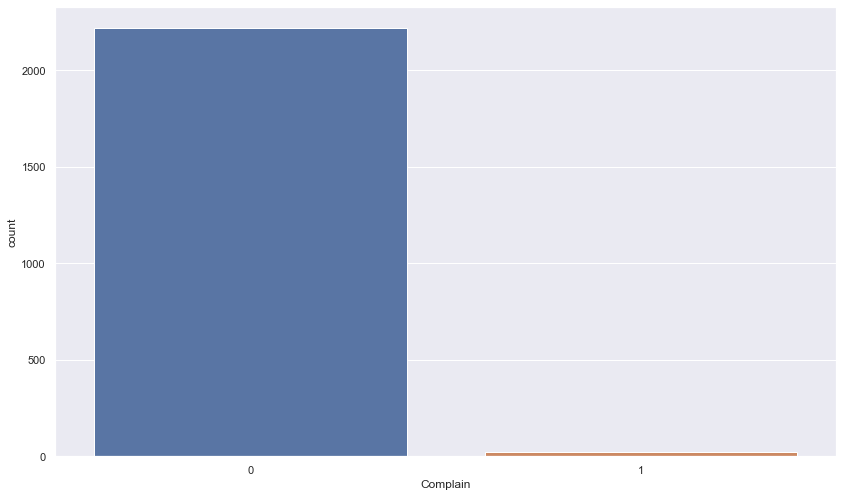

In [36]:
sns.countplot(x='Complain',data=df)

<AxesSubplot:xlabel='Country', ylabel='MntWines'>

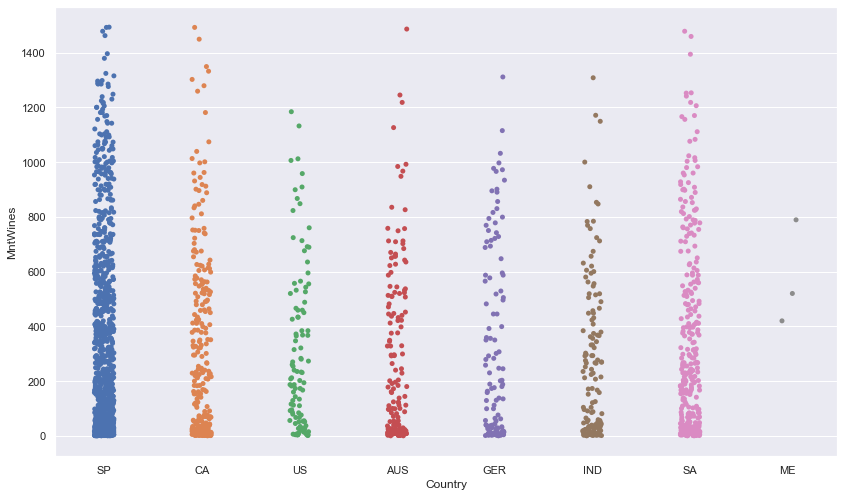

In [37]:
sns.stripplot(y='MntWines',x='Country',data=df)

Some Data Transformations and Feature Engineering

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

In [40]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [41]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# view new features, by customer ID
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


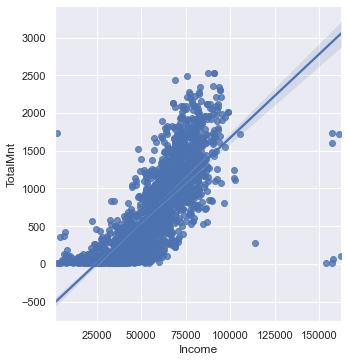

In [42]:
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000]);

In [43]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
ID,1.000000,0.003024,0.013840,0.002202,-0.003543,-0.046755,-0.021181,0.007080,-0.002622,-0.023181,...,-0.005062,-0.021524,-0.015027,-0.021810,0.031520,-0.000989,-0.007496,-0.015830,-0.022457,-0.036025
Year_Birth,0.003024,1.000000,-0.163295,0.234133,-0.363350,-0.019670,-0.163035,-0.013751,-0.030927,-0.042519,...,0.015322,-0.008227,-0.007657,0.018424,-0.004479,-0.095481,-0.025001,-0.113865,-0.179703,0.007393
Income,0.013840,-0.163295,1.000000,-0.428231,0.019285,-0.003111,0.578481,0.430248,0.584361,0.438523,...,0.335032,0.277071,0.087635,0.133302,-0.024902,-0.292873,0.022282,0.667516,0.567432,0.287757
Kidhome,0.002202,0.234133,-0.428231,1.000000,-0.035753,0.007544,-0.496367,-0.372488,-0.437059,-0.387536,...,-0.204994,-0.172512,-0.081794,-0.080176,0.036283,0.690121,0.053919,-0.556902,-0.478494,-0.193287
Teenhome,-0.003543,-0.363350,0.019285,-0.035753,1.000000,0.017115,0.005409,-0.175951,-0.260820,-0.203900,...,-0.190227,-0.140288,-0.015664,-0.154730,0.007591,0.698558,-0.008878,-0.137769,0.133439,-0.158979
Recency,-0.046755,-0.019670,-0.003111,0.007544,0.017115,1.000000,0.016668,-0.003592,0.023705,0.001532,...,0.000956,-0.019258,-0.001764,-0.198568,0.005398,0.017796,-0.025523,0.021199,0.006073,-0.088749
MntWines,-0.021181,-0.163035,0.578481,-0.496367,0.005409,0.016668,1.000000,0.388518,0.561993,0.399073,...,0.471969,0.354365,0.206040,0.247392,-0.035930,-0.351487,-0.153805,0.891734,0.712838,0.488908
MntFruits,0.007080,-0.013751,0.430248,-0.372488,-0.175951,-0.003592,0.388518,1.000000,0.542057,0.594438,...,0.212027,0.195380,-0.009701,0.125904,-0.002800,-0.394122,-0.054827,0.613122,0.456060,0.172083
MntMeatProducts,-0.002622,-0.030927,0.584361,-0.437059,-0.260820,0.023705,0.561993,0.542057,1.000000,0.567880,...,0.372212,0.310096,0.043090,0.236640,-0.020720,-0.501814,-0.082110,0.842655,0.554316,0.329733
MntFishProducts,-0.023181,-0.042519,0.438523,-0.387536,-0.203900,0.001532,0.399073,0.594438,0.567880,1.000000,...,0.198163,0.260908,0.002583,0.111415,-0.018818,-0.425136,-0.067306,0.642395,0.469374,0.179535


<AxesSubplot:>

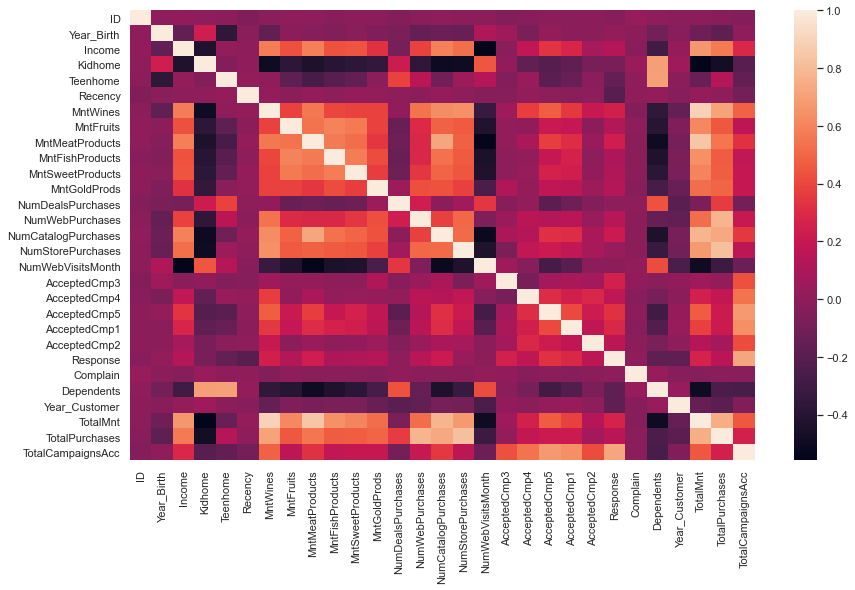

In [44]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Dependents', ylabel='TotalMnt'>

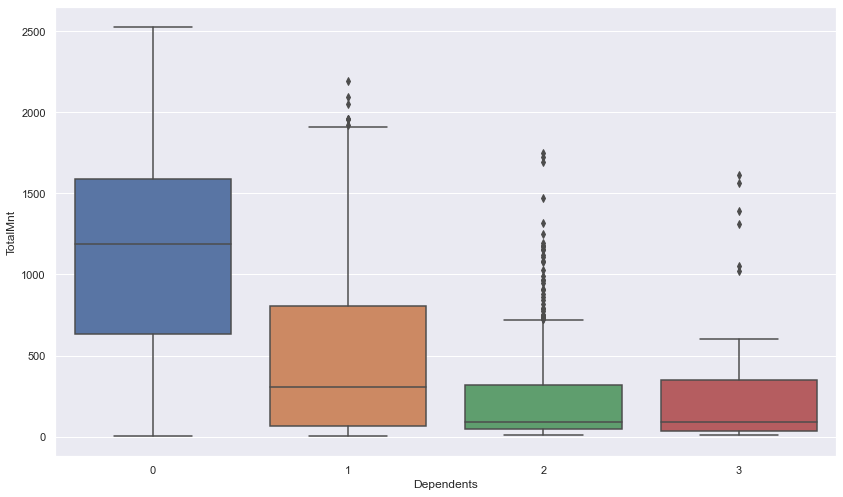

In [45]:
sns.boxplot(x='Dependents',y='TotalMnt',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='NumDealsPurchases'>

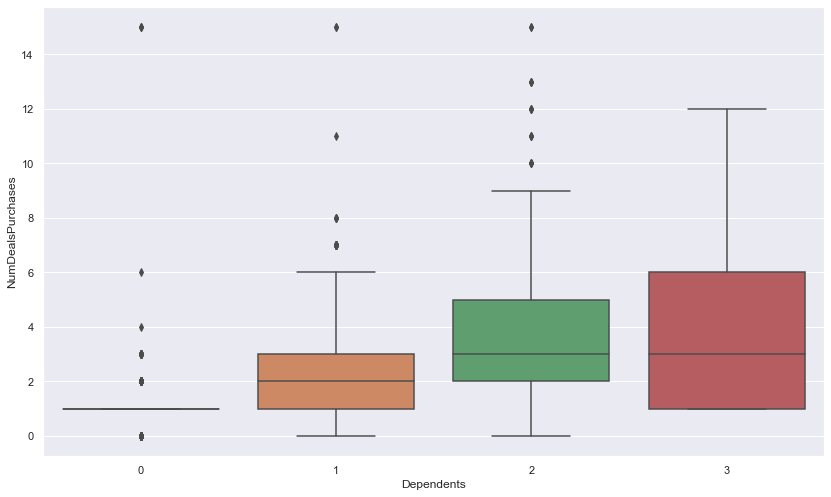

In [46]:
sns.boxplot(x='Dependents',y='NumDealsPurchases',data=df)

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='Income'>

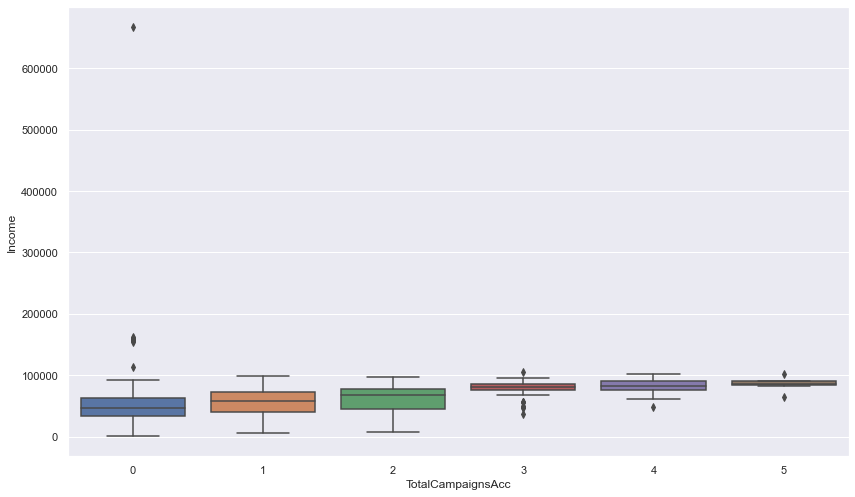

In [47]:
sns.boxplot(x='TotalCampaignsAcc',y='Income',data=df)

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='Dependents'>

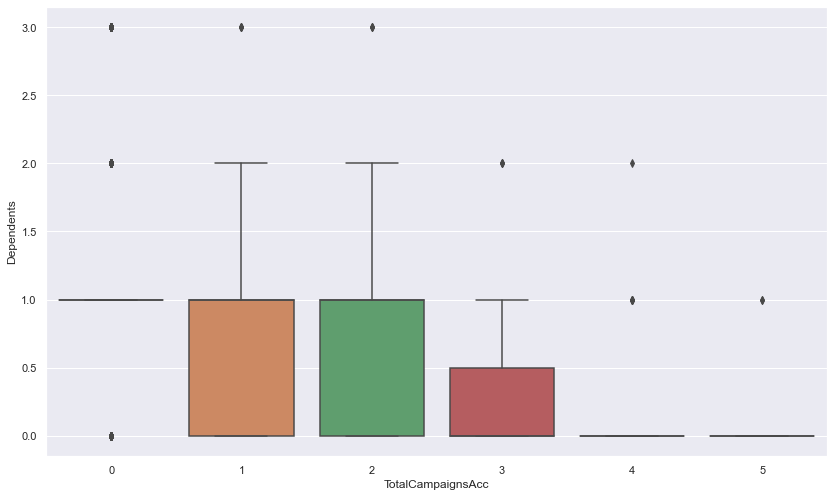

In [48]:
sns.boxplot(x='TotalCampaignsAcc',y='Dependents',data=df)

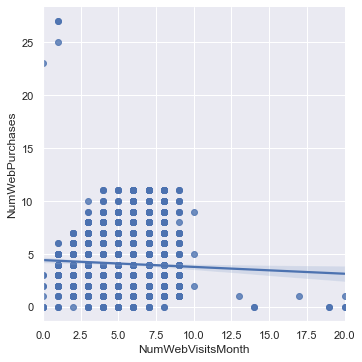

In [49]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df)

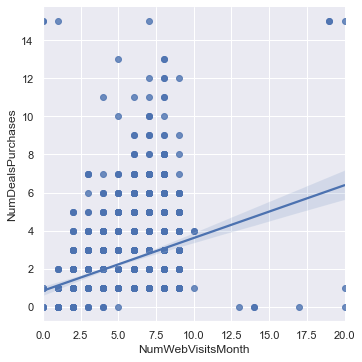

In [50]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df)